In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from sunpy.coordinates import get_body_heliographic_stonyhurst

In [3]:
gps = [44.37197, -116.87393] * u.deg

In [6]:
time = datetime(2017, 8, 21, 17, 25, 0)

In [7]:
loc = EarthLocation(lat=gps[0], lon=gps[1])
location_frame = AltAz(obstime=time, location=loc)

In [8]:
sun = get_body_heliographic_stonyhurst('sun', time).transform_to(location_frame)
moon = get_body_heliographic_stonyhurst('moon', time).transform_to(location_frame)

Let's check that the Sun and the moon are at the same location in the sky, also referred to as eclipsing!

In [13]:
print("The Sun is at {0} az {1} alt".format(sun.az, sun.alt))

Sun is at 124.83065443897897 deg az 44.99775166702356 deg alt


In [14]:
print("The Moon is at {0} az {1} alt".format(moon.az, moon.alt))

The Moon is at 124.83755196307085 deg az 45.00650673581138 deg alt


Yes they are! Now let's get the location of some other objects that will be around at the time. The information on the location of regulus in the sky is from it's wikipedia page

In [15]:
regulus = SkyCoord(ra='10h08m22.311s', dec='11d58m01.95s', frame='icrs').transform_to(location_frame)
mercury = get_body_heliographic_stonyhurst('mercury', time).transform_to(location_frame)
mars = get_body_heliographic_stonyhurst('mars', time).transform_to(location_frame)

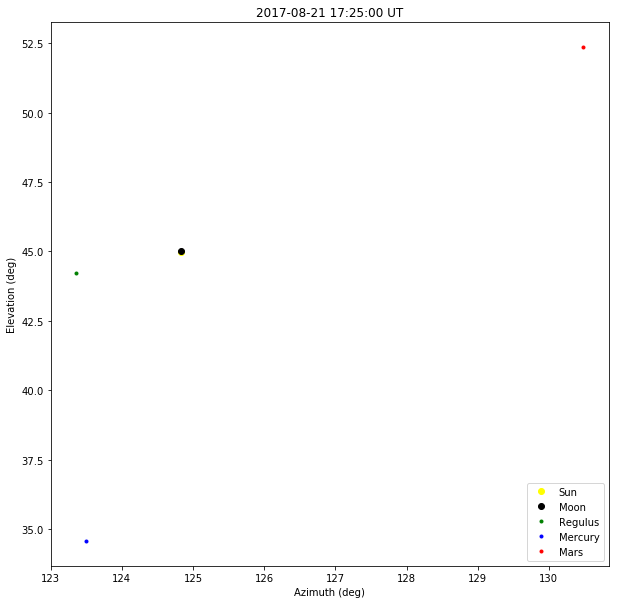

In [17]:
plt.figure(figsize=(10,10))
plt.plot(sun.az, sun.alt, 'o', color='yellow', label='Sun');
plt.plot(moon.az, moon.alt, 'o', color='black', label='Moon');

plt.plot(regulus.az, regulus.alt, '.', color='green', label='Regulus');
plt.plot(mercury.az, mercury.alt, '.', color='blue', label='Mercury');
plt.plot(mars.az, mars.alt, '.', color='red', label='Mars');

plt.title(str(time) + ' UT');
plt.xlabel('Azimuth (deg)');
plt.ylabel('Elevation (deg)');
plt.legend(loc=4);

plt.show()